In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key
import gmaps
# Google developer API key
from config1 import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)
import datetime
import numpy as np
rdf = pd.read_pickle('./launches.pickle')
rdf.head()

,rocket,family,rock_agency,location,lat,lon,result,failreason,date,lsp_name,lsp_country
0,Falcon 9 v1.1,Falcon,SpaceX,"Space Launch Complex 40, Cape Canaveral, FL",28.561941,-80.577357,1,NA,2014-01-06 22:06:00,SpaceX,USA
1,Antares 120,Antares,Orbital ATK,"Launch Area 0 A, Wallops Island, Virginia",37.833700,-75.488100,1,NA,2014-01-09 18:07:05,Orbital Sciences Corporation,USA
2,Ariane 5 ECA,Ariane,NA,"Ariane Launch Area 3, Kourou",5.239000,-52.768000,1,NA,2014-02-06 21:30:07,Arianespace,FRA
3,Atlas V 401,Atlas,NA,"Space Launch Complex 41, Cape Canaveral, FL",28.583410,-80.583036,1,NA,2014-01-24 02:33:00,United Launch Alliance,USA
4,Soyuz U,Soyuz,NA,"1/5, Baikonur Cosmodrome, Kazakhstan",45.920000,63.342000,1,NA,2014-02-05 16:23:32,Russian Federal Space Agency (ROSCOSMOS),RUS


In [2]:
year = []
rdf['year'] = rdf['date'].dt.year
bins = [1969, 1980, 1990, 2000, 2010, 2020]
# Create the names for the four bins
group_names = ["1970's", "1980's", "1990's", "2000's", "2010's"]
rdf["Decade"] = pd.cut(rdf["year"], bins, labels=group_names)
rdf_f = rdf.loc[rdf['result'] == 0]
rdf_p = rdf.loc[rdf['result'] == 1]

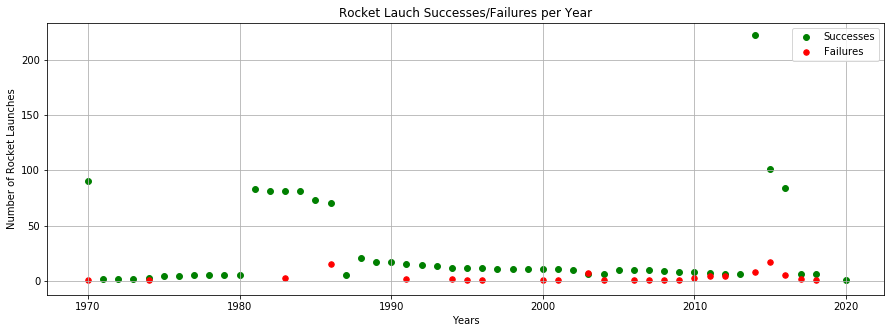

In [3]:
plt.figure(figsize=(15,5))
plt.scatter(list(rdf_p["year"].unique()),list(rdf_p['year'].value_counts()),35, marker="o", facecolors="green", edgecolors="green",label='Successes')
plt.scatter(list(rdf_f["year"].unique()),list(rdf_f['year'].value_counts()),30, marker="o", facecolors="red", edgecolors="red",label='Failures')
plt.title("Rocket Lauch Successes/Failures per Year")
plt.xlabel("Years")
plt.ylabel("Number of Rocket Launches")
plt.grid(which = 'major')
plt.legend()
plt.savefig('../Rocket Lauch Successes_Failures per Year.png')

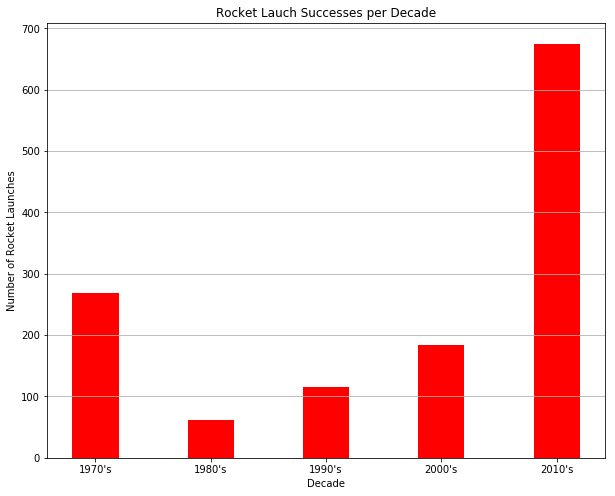

In [4]:
plt.figure(figsize=(10,8))
plt.bar(group_names, rdf_p.groupby(["Decade"]).count()["rocket"], color='r',width = 0.4, align="center")
plt.title("Rocket Lauch Successes per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Rocket Launches")
plt.grid(axis = 'y')
plt.savefig('../Rocket Lauch Successes per Decade.png')

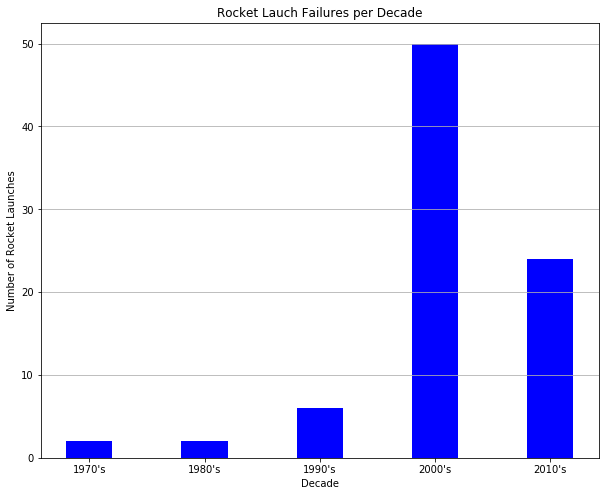

In [5]:
plt.figure(figsize=(10,8))
plt.bar(group_names, rdf_f.groupby(["Decade"]).count()["rocket"], color='b',width = 0.4, align="center")
plt.title("Rocket Lauch Failures per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Rocket Launches")
plt.grid(axis = 'y')
plt.savefig('../Rocket Lauch Failures per Decade.png')

In [12]:
z = [ (a,b) for a in rdf_f['lat'] for b in rdf_f['lon'] ]
# Customize the size of the figure
figure_layout = {
    'width': '1500px',
    'height': '1500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout) 
# Assign the marker layer to a variable
markers = gmaps.marker_layer(z)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='1500px', margin='0 auto 0 auto', padding='1px', w…

In [ ]:
z1 = [ (c,d) for c in rdf_p['lat'] for d in rdf_p['lon'] ]
# Customize the size of the figure
figure_layout = {
    'width': '1500px',
    'height': '1500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig1 = gmaps.figure(layout=figure_layout) 
# Assign the marker layer to a variable
markers = gmaps.marker_layer(z1)
# Add the layer to the map
fig1.add_layer(markers)
fig1